<a href="https://colab.research.google.com/github/lizzzb/Community-Detection-Algorithm/blob/main/Girvan-Newman%20Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Community Detection : Data Science Concepts
### Girvan-Newman Algorithm

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

The provided Python code using NetworkX library creates a graph G with 12 nodes and 16 edges. The nodes are labeled from 1 to 12, and the edges connect the following pairs of nodes.

The nx.draw function visualizes the graph with nodes colored red and labels attached to each node.

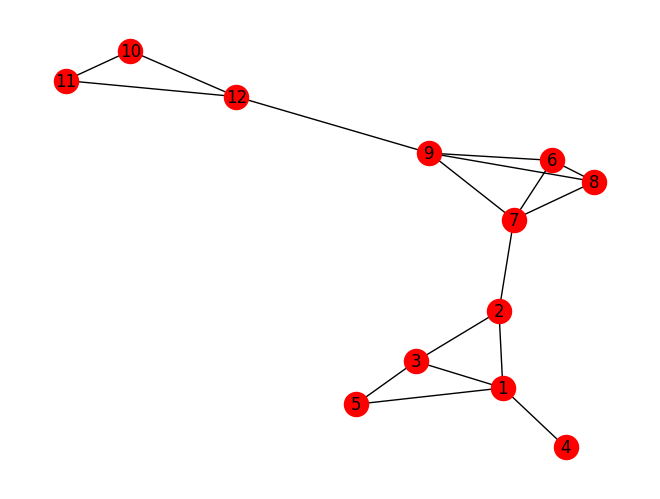

In [23]:
G = nx.Graph()
G.add_edges_from([[1,2], [2,3], [1,3], [1,4], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12],
                  [9,12], [2,7]])
nx.draw(G, with_labels=True, node_color='r')

The number of nodes in the network:

In [24]:
TOT_PAIRS = (12*11)/2
TOT_PAIRS

66.0

For nodes 7 and 2:

In [25]:
35 / TOT_PAIRS

0.5303030303030303

For nodes 12 and 9:

In [26]:
27/ TOT_PAIRS

0.4090909090909091

The code `edge_betwenness = nx.edge_betweenness_centrality(G).items()` calculates the edge betweenness centrality of the graph G and returns a list of tuples, where each tuple contains an edge and its corresponding betweenness centrality value.

**Edge Betweenness Centrality**

Edge betweenness centrality measures **the importance of an edge in a network by counting the number of shortest paths that pass through it.** **Edges with high betweenness centrality are considered critical for connecting different parts of the network.**

Code Breakdown:

  `nx.edge_betweenness_centrality(G)`: Calculates the edge betweenness centrality of the graph G.
  `.items()`: Converts the result into a list of tuples, where each tuple contains an edge (represented as a tuple of node IDs) and its corresponding betweenness centrality value.

In [27]:
nx.edge_betweenness_centrality(G)

{(1, 2): 0.30303030303030304,
 (1, 3): 0.030303030303030304,
 (1, 4): 0.16666666666666669,
 (1, 5): 0.09090909090909091,
 (2, 3): 0.18181818181818182,
 (2, 7): 0.5303030303030303,
 (3, 5): 0.07575757575757576,
 (6, 7): 0.09090909090909091,
 (6, 9): 0.06060606060606061,
 (6, 8): 0.015151515151515152,
 (7, 8): 0.09090909090909091,
 (7, 9): 0.36363636363636365,
 (8, 9): 0.06060606060606061,
 (9, 12): 0.4090909090909091,
 (10, 11): 0.015151515151515152,
 (10, 12): 0.15151515151515152,
 (11, 12): 0.15151515151515152}

In [28]:
edge_betwenness = nx.edge_betweenness_centrality(G).items()
sorted(edge_betwenness, key=lambda pair: -pair[1])[0][0] #the highest edge-betweeness

(2, 7)

The following code iteratively removes edges from a graph based on their betweenness centrality and visualizes the changes:

**1. Setting Up:**

    `NUM_ITERATIONS = 10`: This line defines **the number of times the loop will run, effectively removing 10 edges in this case.**

**2. Looping for Edge Removal:**

    for i in range(NUM_ITERATIONS):: This loop iterates NUM_ITERATIONS times (10 times in this case).

**3. Finding Most Central Edge: **

    `edge_betweenness = nx.edge_betweenness_centrality(G).items()`: This line calculates the edge betweenness centrality for the current graph G and **converts the result into a list of tuples**. Each tuple contains an edge (represented as a node ID pair) and its corresponding betweenness centrality value.
    `sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]`: This line sorts the edge_betweenness list in descending order based on the betweenness centrality value (the second element in each tuple). It then selects the first element (index 0) from the sorted list, which is the tuple containing the edge with the highest betweenness centrality. Finally, it extracts the actual edge (node ID pair) from the first element, resulting in the edge_to_delete.

**4. Edge Removal:**

    `G.remove_edge(*edge_to_delete)`: This line removes the identified edge_to_delete from the graph G. The * operator unpacks the tuple into individual node IDs for the remove_edge function.

**5. Visualization:**

    `nx.draw(G, with_labels=True, node_color='r')`: This line visualizes the current state of the graph G using NetworkX's drawing capabilities. It displays nodes with labels and sets the node color to red.
    `plt.title('Step %s\nEdge %s Deleted' % (i, edge_to_delete), fontsize=20)`: This line sets the title for the plot, indicating the current step number (i) and the edge that was just deleted (edge_to_delete). The % operator is used for string formatting.
    plt.show(): This line displays the generated visualization of the graph.

Overall, this code simulates a process of identifying and removing the most "important" edges (based on betweenness centrality) from a network in each iteration. It then visualizes the resulting network after each edge removal.

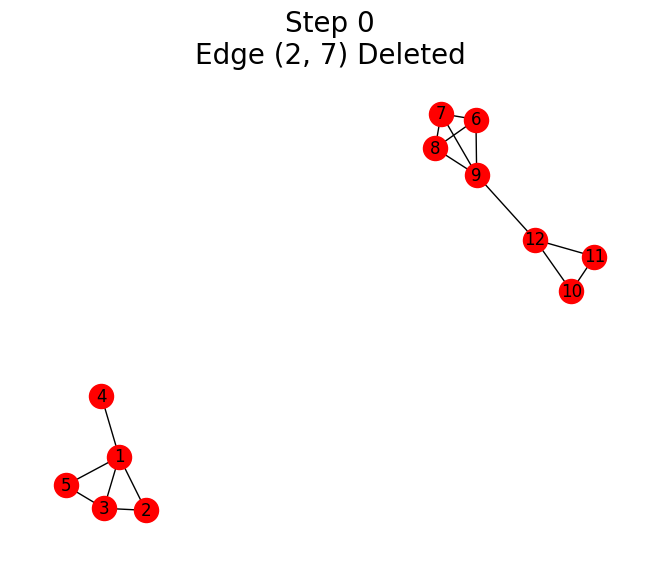

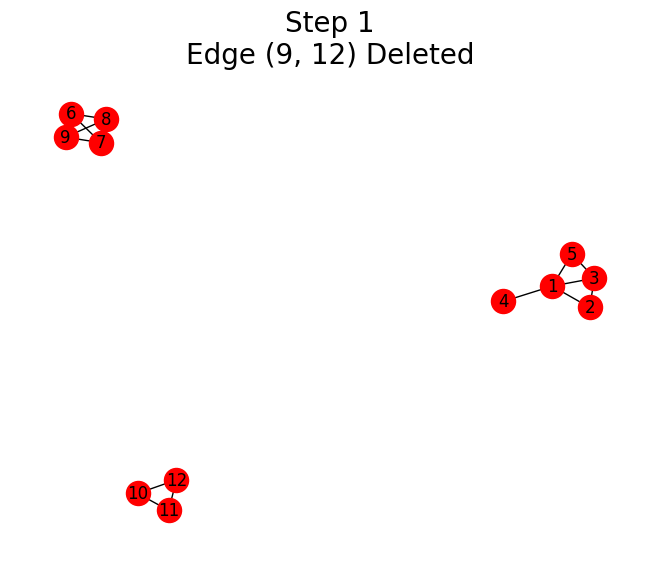

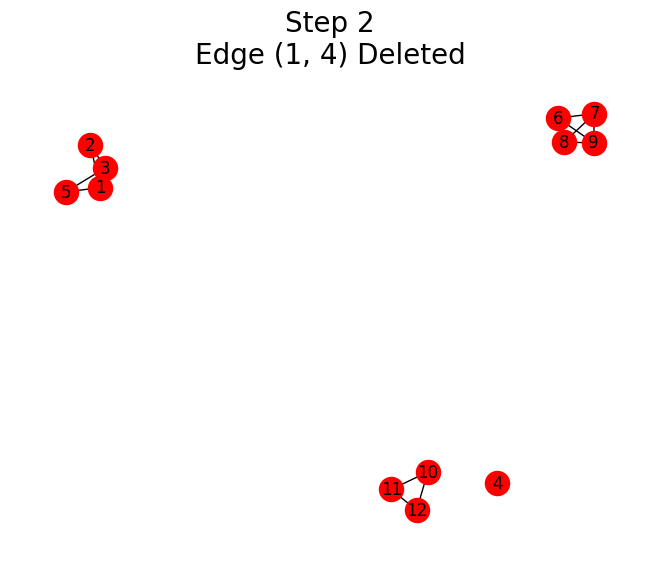

In [29]:
NUM_ITERATIONS = 3
for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

    G.remove_edge(*edge_to_delete)

    nx.draw(G, with_labels=True, node_color='r')
    plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)

    plt.show()